#SALES DATA - BUSINESS ANALYSIS


##  Problem Statement

The objective of this analysis is to understand: <br>
 -  Superstore's sales performance
- Identify loss-making areas
- Provide data-driven recommendations to improve
profitability and efficiency.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [5]:
df = pd.read_csv('/content/Superstore_FullyCleaned.csv')

print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
1       2  CA-2016-152156  08-11-2016  11-11-2016    Second Class    CG-12520   
2       3  CA-2016-138688  12-06-2016  16-06-2016    Second Class    DV-13045   
3       4  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   
4       5  US-2015-108966  11-10-2015  18-10-2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Quantity  \
0      Claire Gute   Consumer  United States        Henderson  ...        2   
1      Claire Gute   Consumer  United States        Henderson  ...        3   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...        2   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...        5   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...        2   

   Discount    Profit Shipping_Days Or

##  Dataset Overview
The dataset contains order-level sales data including product details,
customer segments, regions, discounts, and profit.


In [8]:
df.shape


(9994, 28)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row ID             9994 non-null   int64  
 1   Order ID           9994 non-null   object 
 2   Order Date         9994 non-null   object 
 3   Ship Date          9994 non-null   object 
 4   Ship Mode          9994 non-null   object 
 5   Customer ID        9994 non-null   object 
 6   Customer Name      9994 non-null   object 
 7   Segment            9994 non-null   object 
 8   Country            9994 non-null   object 
 9   City               9994 non-null   object 
 10  State              9994 non-null   object 
 11  Postal Code        9994 non-null   int64  
 12  Region             9994 non-null   object 
 13  Product ID         9994 non-null   object 
 14  Category           9994 non-null   object 
 15  Sub-Category       9994 non-null   object 
 16  Product Name       9994 

In [13]:
category_profit = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Profit')
category_profit


,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


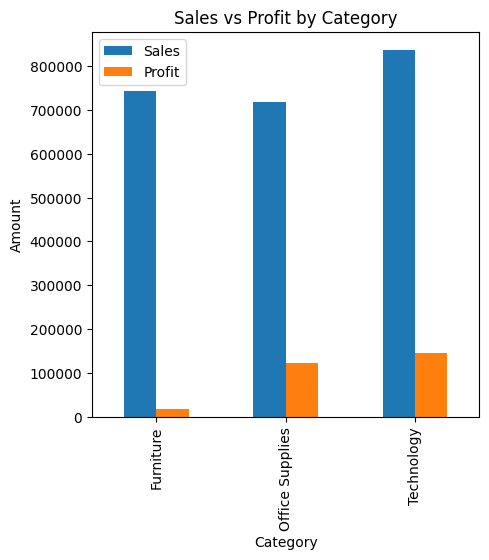

In [12]:
category_profit.plot(kind='bar', figsize=(5,5))
plt.title('Sales vs Profit by Category')
plt.ylabel('Amount')
plt.show()


Furniture generates high sales but comparatively low profit,
indicating margin or discount-related issues. <br>
<br>
Better investment returns from TECHNOLOGY AND OFFICE SUPPLIES


In [21]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
subcat_profit.head(10)

,Profit
Sub-Category,
Tables,-17725.4811
Bookcases,-3472.5560
Supplies,-1189.0995
Fasteners,949.5182
Machines,3384.7569
Labels,5546.2540
Art,6527.7870
Envelopes,6964.1767
Furnishings,13059.1436


In [30]:
df[['Category','Sub-Category']].drop_duplicates().sort_values(by='Category')

,Category,Sub-Category
0,Furniture,Bookcases
1,Furniture,Chairs
3,Furniture,Tables
5,Furniture,Furnishings
138,Office Supplies,Supplies
53,Office Supplies,Fasteners
30,Office Supplies,Envelopes
12,Office Supplies,Paper
9,Office Supplies,Appliances
8,Office Supplies,Binders


Sub-categories like Tables and Bookcases are loss-making
despite significant sales volume.


In [31]:
discount_analysis = df.groupby('Discount')[['Sales','Profit']].mean()
discount_analysis


,Sales,Profit
Discount,,
0.00,226.742074,66.900292
0.10,578.397351,96.055074
0.15,529.971567,27.288298
0.20,209.076940,24.702572
0.30,454.742974,-45.679636
0.32,536.794770,-88.560656
0.40,565.134874,-111.927429
0.45,498.634000,-226.646464
0.50,892.705152,-310.703456


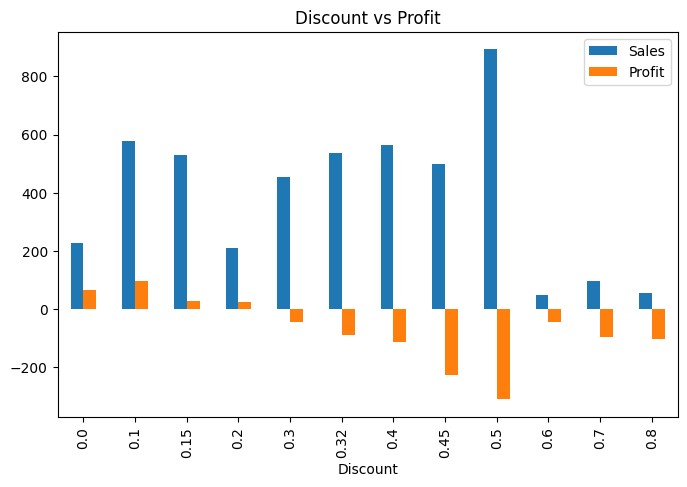

In [33]:
discount_analysis.plot(kind='bar',figsize=(8,5))
plt.title('Discount vs Profit')
plt.show()


Discounts above 20% leads to negative average profit,
indicating aggressive discounting hurts profitability.


In [36]:
segment_profit = df.groupby('Segment')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=True)
segment_profit


,Sales,Profit
Segment,,
Home Office,4.296531e+05,60298.6785
Corporate,7.061464e+05,91979.1340
Consumer,1.161401e+06,134119.2092


Corporate segment contributes the highest profit per order
and should be prioritized for retention strategies.


In [ ]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
region_profit


Certain regions consistently underperform and require pricing
or logistics optimization.


In [ ]:
ship_profit = df.groupby('Ship Mode')['Profit'].mean()
ship_profit


Same Day shipping shows lower profit margins,
suggesting higher operational costs.
